# Perform EDA on the Chicago Grand Theft Auto dataset 
To understand motor vehicle thefts in the city. 

In [2]:
%matplotlib inline
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the Data

In [17]:
df = pd.read_csv('D:/DS/analytics_edge/chicago_gta.csv', low_memory = False)

In [18]:
df.shape

(191641, 11)

In [19]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude
0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012,41.756284,-87.621645
1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012,41.898788,-87.661303
2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,41.969186,-87.767670
3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012,41.769329,-87.657726
4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012,41.837568,-87.621761


In [20]:
pandas_profiling.ProfileReport(df)

Number of variables,11
Number of observations,191641
Total Missing (%),3.4%
Total size in memory,13.5 MiB
Average record size in memory,74.0 B
Numeric,4
Categorical,4
Boolean,2
Date,0
Text (Unique),0
Rejected,1


In [22]:
df['ID'].idxmax()

18133

In [23]:
df.loc[df.index == 18133]

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude
18133,9181151,9/22/11 17:00,STREET,False,False,2232,NaN,73,2011,NaN,NaN


In [24]:
df['Beat'].min()

111

In [25]:
#number of crimes in which an arrest was made
df.loc[df['Arrest'] == True].count()

ID                     15536
Date                   15536
LocationDescription    15536
Arrest                 15536
Domestic               15536
Beat                   15536
District               10886
CommunityArea          12810
Year                   15536
Latitude               15354
Longitude              15354
dtype: int64

In [26]:
#instances where the crime took place in an alley
df.loc[df['LocationDescription'] == 'ALLEY'].count()

ID                     2308
Date                   2308
LocationDescription    2308
Arrest                 2308
Domestic               2308
Beat                   2308
District               1688
CommunityArea          1980
Year                   2308
Latitude               2285
Longitude              2285
dtype: int64

#### Manipulating Dates

In [27]:
df['Date'].dtype

dtype('O')

In [30]:
df['Date'] = pd.to_datetime(df['Date'])

In [31]:
df['Date'].dtype

dtype('<M8[ns]')

In [50]:
df['Date'].head()

0   2012-12-31 23:15:00
1   2012-12-31 22:00:00
2   2012-12-31 22:00:00
3   2012-12-31 22:00:00
4   2012-12-31 21:30:00
Name: Date, dtype: datetime64[ns]

Finding the median date for the given dataset

In [51]:
dates = df['Date'].tolist()
print(len(dates)//2)    

95820


In [52]:
df.Date[95850]  

Timestamp('2006-05-20 21:00:00')

Extract month and day from Date column and add to separate column.

In [101]:
import datetime as dt
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.strftime('%a')

In [102]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude,Month,Day
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,41.756284,-87.621645,12,Mon
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,41.898788,-87.661303,12,Mon
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,41.969186,-87.767670,12,Mon
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,41.769329,-87.657726,12,Mon
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,41.837568,-87.621761,12,Mon


In [82]:
df.Month.value_counts()

10    17086
7     16801
8     16572
12    16426
11    16063
9     16060
1     16047
5     16035
6     16002
3     15758
4     15280
2     13511
Name: Month, dtype: int64

The above is sorted is descending order. Month 2 has the least number of observations. Hence, February has the lowest occurences of GTA and October has the most.

In [83]:
df.Day.value_counts()

Fri    29284
Wed    27416
Mon    27397
Thu    27319
Sat    27118
Tue    26791
Sun    26316
Name: Day, dtype: int64

Hence, Friday sees the most crime commited and Sunday sees the least.

In [103]:
df.Year.value_counts()

2001    20669
2002    18753
2004    16862
2003    16657
2005    16484
2006    16098
2011    15637
2010    15497
2008    14445
2007    14280
2012    14092
2009    12167
Name: Year, dtype: int64

Most crimes occured in 2001, least in 2009.

Classifying months with instances of arrests.

In [86]:
df.loc[df['Arrest'] == True].Month.value_counts()

1     1435
12    1397
10    1342
8     1329
7     1324
3     1298
11    1256
4     1252
9     1248
2     1238
6     1230
5     1187
Name: Month, dtype: int64

Most arrests: January, Least arrests: May

In [87]:
df.loc[df['Arrest'] == True].Day.value_counts()

Fri    2370
Sun    2330
Sat    2255
Wed    2210
Mon    2176
Tue    2108
Thu    2087
Name: Day, dtype: int64

Most arrests: Friday, Least arrests: Thursday

#### Visualizing crime trends

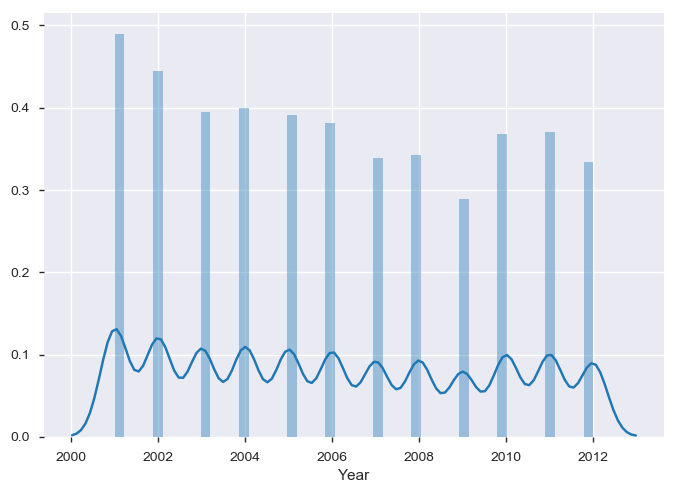

In [104]:
sns.distplot(df['Year'], bins = 50)

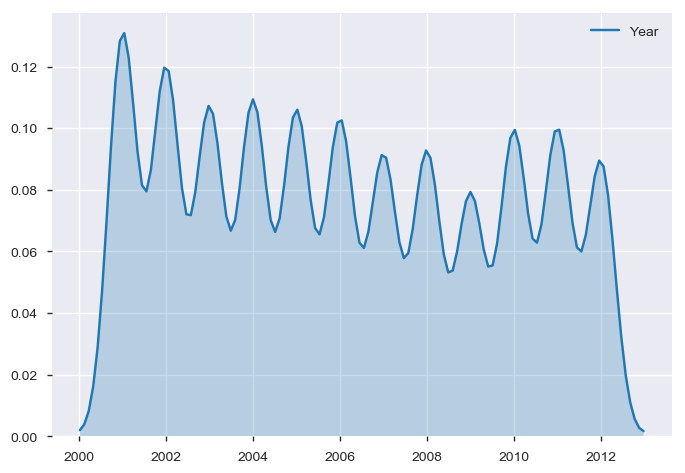

In [105]:
sns.kdeplot(df['Year'], shade = True)

Crimes decrease from 2002 to 2009, and then rise back up through 2012.

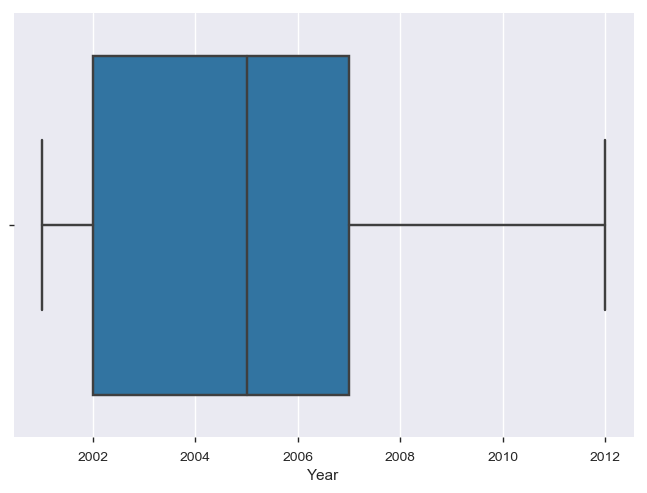

In [110]:
sns.boxplot(df.loc[df['Arrest'] == True].Year)

Since range of the data is from 2002 to 2012, the middle of the time period is the beginning of 2007. It looks like there were more crimes for which arrests were made in the first half of the time period or the second half of the time period.

In [113]:
arrest_year = pd.crosstab(index = df['Year'], columns = df['Arrest'])
arrest_year

Arrest,False,True
Year,,
2001,18517,2152
2002,16638,2115
2003,14859,1798
2004,15169,1693
2005,14956,1528
2006,14796,1302
2007,13068,1212
2008,13425,1020
2009,11327,840


For 2001, Arrested = 2152, not Arrested = 18517.
Therefore, the fraction of motor vehicle thefts in 2001 for which an arrest was made is thus 2152/(2152+18517) = 0.1041173.

For 2007 has 1212 observations with Arrest=TRUE and 13068 observations with Arrest=FALSE. The fraction of motor vehicle thefts in 2007 for which an arrest was made is thus 1212/(1212+13068) = 0.08487395.

2012 has 550 observations with Arrest=TRUE and 13542 observations with Arrest=FALSE. The fraction of motor vehicle thefts in 2012 for which an arrest was made is thus 550/(550+13542) = 0.03902924.

In [126]:
df.LocationDescription.value_counts()

STREET                                             156564
PARKING LOT/GARAGE(NON.RESID.)                      14852
OTHER                                                4573
ALLEY                                                2308
GAS STATION                                          2111
DRIVEWAY - RESIDENTIAL                               1675
RESIDENTIAL YARD (FRONT/BACK)                        1536
RESIDENCE                                            1302
RESIDENCE-GARAGE                                     1176
VACANT LOT/LAND                                       985
VEHICLE NON-COMMERCIAL                                817
SIDEWALK                                              462
CHA PARKING LOT/GROUNDS                               405
AIRPORT/AIRCRAFT                                      363
POLICE FACILITY/VEH PARKING LOT                       266
PARK PROPERTY                                         255
SCHOOL, PUBLIC, GROUNDS                               206
APARTMENT     

In [137]:
options = ['STREET', 'PARKING LOT/GARAGE(NON.RESID.)', 'ALLEY', 'GAS STATION', 'DRIVEWAY - RESIDENTIAL']

In [138]:
top5 = df.loc[df['LocationDescription'].isin(options)]

In [144]:
top5.sample(5)

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude,Month,Day
101096,4553012,2006-01-23 21:30:00,STREET,False,False,321,3,42,2006,41.773334,-87.597140,1,Mon
114442,3909131,2005-04-09 14:00:00,STREET,False,False,412,4,48,2005,41.734187,-87.586713,4,Sat
148264,2665599,2003-04-04 17:06:00,PARKING LOT/GARAGE(NON.RESID.),True,False,2532,25,25,2003,41.909496,-87.764876,4,Fri
492,8938848,2012-12-19 19:20:00,STREET,False,False,2522,25,19,2012,41.923199,-87.748075,12,Wed
163117,2163835,2002-06-03 02:00:00,STREET,False,False,1023,NaN,29,2002,41.864789,-87.695714,6,Mon


In [145]:
top5.shape

(177510, 13)

Number of observations within the top 5 areas for crime is 177510.

In [149]:
arrest_top5 = pd.crosstab(index = top5['LocationDescription'], columns = top5['Arrest'])
arrest_top5.head()

Arrest,False,True
LocationDescription,,
ALLEY,2059,249
DRIVEWAY - RESIDENTIAL,1543,132
GAS STATION,1672,439
PARKING LOT/GARAGE(NON.RESID.),13249,1603
STREET,144969,11595


Inferring from the above daaframe, gas station has the highest arrest rate.

In [161]:
top5.loc[top5['LocationDescription'] == 'GAS STATION'].Day.value_counts()

Sat    338
Sun    336
Fri    332
Thu    282
Mon    280
Wed    273
Tue    270
Name: Day, dtype: int64

Most motor theft happens on saturday at gas stations.

In [162]:
top5.loc[top5['LocationDescription'] == 'DRIVEWAY - RESIDENTIAL'].Day.value_counts()

Thu    263
Fri    257
Mon    255
Tue    243
Wed    234
Sun    221
Sat    202
Name: Day, dtype: int64

Fewest motor vehicle theft also happens  on saturdays at residential driveways.